In [2]:
from astropy.io import ascii
import numpy as np
import matplotlib.pyplot as plt
from lmfit import minimize as minim
from lmfit import Model,fit_report, Parameters

In [3]:
home='/home/igonzalez/Downloads/bulgaria/' 
file=home+'bulgaria_data2.csv' 
data=ascii.read(file)
print(data)

    JD_UTC     rel_flux_T1 rel_flux_err_T1
-------------- ----------- ---------------
2458494.391679     0.20863         0.00079
2458494.393842    0.206555        0.000782
2458494.396005    0.207901        0.000788
2458494.398168    0.208565        0.000784
 2458494.40033    0.208273        0.000784
2458494.402493     0.20599        0.000777
2458494.404656    0.206938        0.000782
2458494.406818    0.207562        0.000779
2458494.408981    0.207397         0.00079
2458494.411144    0.205377        0.000787
           ...         ...             ...
2458494.493328    0.148638        0.000704
2458494.495491    0.150221        0.000709
2458494.497653    0.152403        0.000716
2458494.499816    0.153632        0.000715
2458494.501979    0.156233        0.000728
2458494.504142    0.156179        0.000722
2458494.506304    0.159954        0.000724
2458494.508468    0.162518        0.000727
2458494.510631    0.164356        0.000729
2458494.512793    0.166063        0.000731
2458494.514

In [4]:
jd=data['JD_UTC']
flux=data['rel_flux_T1']
err_flux=data['rel_flux_err_T1']
n=len(jd)
hour=np.zeros(n)

#we convert the Julian dates into hours by creating a new list
for i in range(1,n):
    step=(jd[i]-jd[i-1])*2.4/0.1
    hour[i]=step+hour[i-1]
        
print(hour)    

[0.         0.051912   0.103824   0.155736   0.207624   0.259536
 0.311448   0.363336   0.415248   0.46716    0.519048   0.57096
 0.622872   0.67476    0.726672   0.778584   0.83047199 0.882384
 0.934296   0.98618399 1.03809599 1.090008   1.14189599 1.193832
 1.245744   1.297632   1.349544   1.401456   1.453344   1.505256
 1.557168   1.60905599 1.660968   1.71288    1.764792   1.81668
 1.868592   1.920504   1.97239199 2.024304   2.076216   2.12815199
 2.18004    2.231952   2.283864   2.335752   2.387664   2.439576
 2.49148799 2.543376   2.595288   2.6472     2.69911199 2.751
 2.802936   2.854848   2.90673599 2.95864799]


Text(0, 0.5, 'relative flux of Bulgaria')

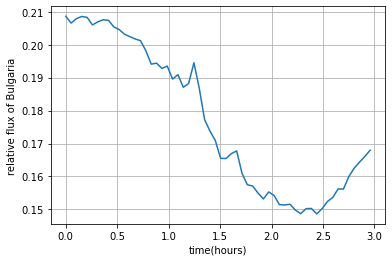

In [5]:
plt.grid()
plt.plot(hour,flux)
plt.xlabel("time(hours)")
plt.ylabel("relative flux of Bulgaria")
#we plot the flux as a function of time and see that it follows a sine law

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 96
    # data points      = 58
    # variables        = 4
    chi-square         = 61566.3060
    reduced chi-square = 1140.11678
    Akaike info crit   = 412.110767
    Bayesian info crit = 420.352539
[[Variables]]
    amp:     0.02868803 +/- 6.7084e-04 (2.34%) (init = 0.11)
    period:  3.87065856 +/- 0.08606183 (2.22%) (init = 4)
    shift:   0.96467477 +/- 0.06127426 (6.35%) (init = 3.141593)
    offset:  0.17965812 +/- 6.1105e-04 (0.34%) (init = 0.18)
[[Correlations]] (unreported correlations are < 0.100)
    C(period, shift)  =  0.911
    C(shift, offset)  =  0.582
    C(period, offset) =  0.342


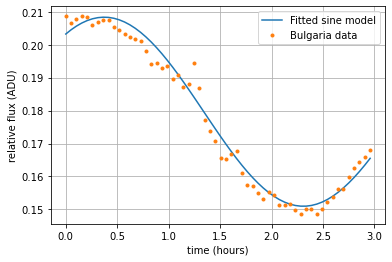

In [6]:
#We create a sine model with parameters that we define in order to fit the best slope for the lightcurve

#We define a sine function 
def sine(x,amp,period,shift,offset):
    return amp*np.sin((2*np.pi/period)*x +shift)+offset

x=hour

#we compute chi² in order to minimize the error on the sine model
def chi_2(param,flux,err_flux,x):
    amp=param['amp'].value
    period=param['period'].value
    shift=param['shift'].value
    offset=param['offset'].value
    sinus=sine(x,amp,period,shift,offset)
    
    chi=((sinus-flux)/(err_flux))**2
    return chi

#we attribute a value to the parameters
param=Parameters()
param.add("amp",value=0.11,min=0,max=0.4,vary=True)#we look at the amplitude of the previous signal
param.add("period",value=4,min=0,max=10,vary=True) #because we know that Trot/2 is close to 4
param.add("shift",value=np.pi,min=0,max=2*np.pi,vary=True)# shift goes from 0 to 2pi
param.add("offset",value=0.18,min=0.1,max=0.5,vary=True)#if we set it to 0, the resulting sine may not begin at the same position

res=minim(chi_2,param,args=(flux,err_flux,x),method='leastsqr')

amp_m=res.params['amp'].value
period_m=res.params['period'].value
shift_m=res.params['shift'].value
offset_m=res.params['offset'].value
print(fit_report(res))

#we create the model with the assigned parameters
sin_m=sine(x,amp_m, period_m,shift_m,offset_m)
plt.figure()
plt.grid()
plt.plot(x,sin_m,label='Fitted sine model')
plt.plot(x,flux,'.',label='Bulgaria data')
plt.xlabel('time (hours)')
plt.ylabel('relative flux (ADU)')
plt.legend(loc='best')